In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('full_tiki.csv')
df.head()

,Name,Category,List-Price,Price,Total Review,Rating Average,Discount,Discount Rate
0,Nước Xả Vải Comfort Cho Da Nhạy Cảm (3.2L/Túi)...,Chăm sóc nhà cửa,209000,168000,1777,4.7,41000,20
1,Túi Nước Giặt Omo Matic Bền Đẹp Cửa Trước 3.7Kg,Chăm sóc nhà cửa,199000,150000,32,5.0,49000,25
2,Túi Nước Giặt OMO Matic Comfort Hương Tinh dầu...,Chăm sóc nhà cửa,199000,161000,26,5.0,38000,19
3,Nước Giặt Ariel Hương Downy Túi 3.2Kg,Chăm sóc nhà cửa,186000,149000,224,4.8,37000,20
4,Combo 2 Túi Nước Giặt Omo Matic Bền Đẹp Cửa Tr...,Chăm sóc nhà cửa,254000,203000,255,4.8,51000,20


In [2]:
len(df)

1625

In [3]:
df['Discount Rate'].isnull().sum()  # đếm số giá trị thiếu trong cột

0

In [4]:
df['Price'].isnull().sum() 

0

## Làm sạch dữ liệu

#### Gaussian Distributed

In [5]:
import matplotlib.pyplot as plt

(array([1.519e+03, 5.000e+01, 1.700e+01, 5.000e+00, 1.100e+01, 1.000e+01,
        3.000e+00, 4.000e+00, 5.000e+00, 1.000e+00]),
 array([5.99900000e+03, 3.70439910e+06, 7.40279920e+06, 1.11011993e+07,
        1.47995994e+07, 1.84979995e+07, 2.21963996e+07, 2.58947997e+07,
        2.95931998e+07, 3.32915999e+07, 3.69900000e+07]),
 <BarContainer object of 10 artists>)

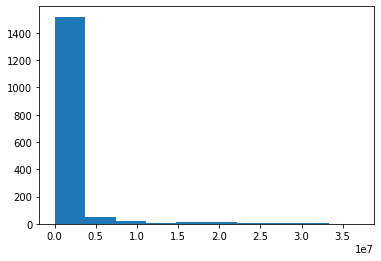

In [6]:
plt.hist(df['Price'])

Text(0, 0.5, 'No of product')

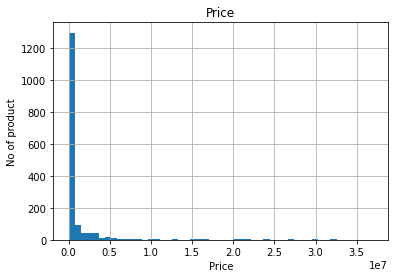

In [7]:
figure=df.Price.hist(bins=50)
figure.set_title('Price')
figure.set_xlabel('Price')
figure.set_ylabel('No of product')

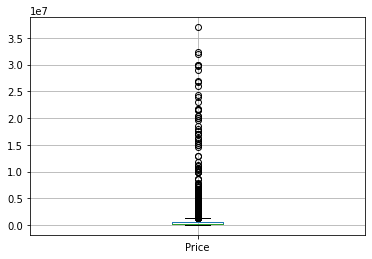

In [8]:
figure=df.boxplot(column="Price")

#### => Dữ liệu có dạng phân bố lệch

Text(0, 0.5, 'No of product')

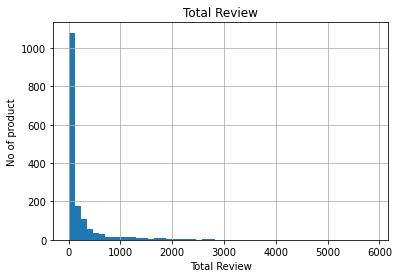

In [9]:
figure=df['Total Review'].hist(bins=50)
figure.set_title('Total Review')
figure.set_xlabel('Total Review')
figure.set_ylabel('No of product')

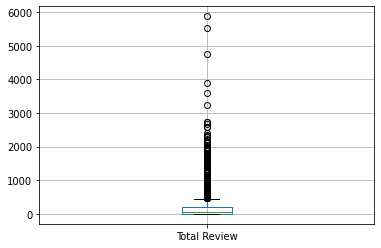

In [10]:
figure=df.boxplot(column="Total Review")

#### => Dữ liệu có dạng phân bố lệch

Text(0, 0.5, 'No of product')

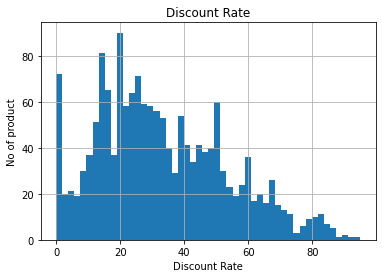

In [11]:
figure=df['Discount Rate'].hist(bins=50)
figure.set_title('Discount Rate')
figure.set_xlabel('Discount Rate')
figure.set_ylabel('No of product')

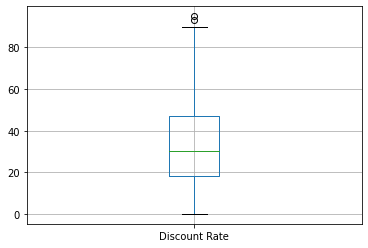

In [12]:
figure=df.boxplot(column="Discount Rate")

#### => Dữ liệu có dạng phân bố chuẩn

#### If The Data Is Normally Distributed We use this #Phân bố chuẩn

In [13]:
uppper_boundary=df['Discount Rate'].mean() + 3* df['Discount Rate'].std()
lower_boundary=df['Discount Rate'].mean() - 3* df['Discount Rate'].std()
print(lower_boundary), print(uppper_boundary),print(df['Discount Rate'].mean())

-27.72392228895645
93.8974607504949
33.08676923076923


(None, None, None)

#### If Features Are Skewed We Use the below Technique #phân bố lệch 

In [14]:
#Tính IQR
IQR_Price=df['Price'].quantile(0.75)-df['Price'].quantile(0.25)
IQR_Review=df['Total Review'].quantile(0.75)-df['Total Review'].quantile(0.25)

In [15]:
#### Extreme outliers
lower_bridge_Price=df['Price'].quantile(0.25)-(IQR_Price*3)
upper_bridge_Price=df['Price'].quantile(0.75)+(IQR_Price*3)
print(lower_bridge_Price), print(upper_bridge_Price)

-1321000.0
1969000.0


(None, None)

In [16]:
#### Extreme outliers
lower_bridge_Review=df['Total Review'].quantile(0.25)-(IQR_Review*3)
upper_bridge_Review=df['Total Review'].quantile(0.75)+(IQR_Review*3)
print(lower_bridge_Review), print(upper_bridge_Review)

-533.0
734.0


(None, None)

In [17]:
data=df.copy()

In [18]:
data.loc[data['Price']>=1969000,'Price']=1969000

In [19]:
data.loc[data['Total Review']>=734,'Total Review']=734

In [20]:
data.loc[data['Discount Rate']>=33,'Discount Rate']=33

Text(0, 0.5, 'No of product')

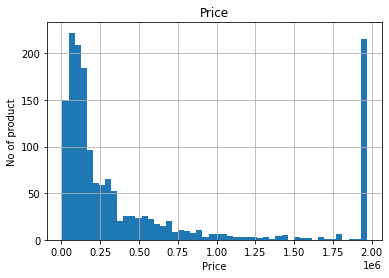

In [21]:
figure=data['Price'].hist(bins=50)
figure.set_title('Price')
figure.set_xlabel('Price')
figure.set_ylabel('No of product')

Text(0, 0.5, 'No of product')

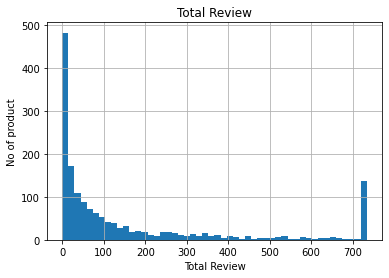

In [22]:
figure=data['Total Review'].hist(bins=50)
figure.set_title('Total Review')
figure.set_xlabel('Total Review')
figure.set_ylabel('No of product')

Text(0, 0.5, 'No of product')

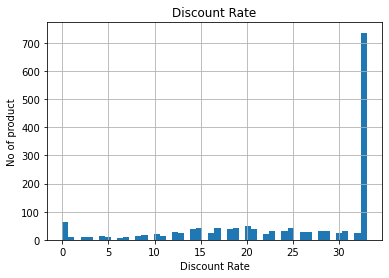

In [23]:
figure=data['Discount Rate'].hist(bins=50)
figure.set_title('Discount Rate')
figure.set_xlabel('Discount Rate')
figure.set_ylabel('No of product')

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Discount Rate','Price']],data['Rating Average'],test_size=0.3)

In [25]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))

ValueError: Unknown label type: 'continuous'

# TRỰC QUAN HÓA DỮ LIỆU

In [ ]:
df['Category'].value_counts()

Có 10 loại sản phẩm được ưa chuộng 

In [ ]:
df['Category'].value_counts()
plt.figure(figsize=(15,10))
sns.countplot(x='Category', data=df, order = df['Category'].value_counts().index )
plt.xticks(rotation=45)

In [ ]:
max(df['Price'])

In [ ]:
min(df['Price'])

In [ ]:
data = df.copy()
data_100nghin = data.loc[data['List-Price'] <= 100000]
data_100nghin['Category'].value_counts().plot(kind = 'barh')

In [ ]:
data_500nghin = data.loc[ (100000 < data['List-Price']) & ( data['List-Price'] <= 500000 )]
data_500nghin['Category'].value_counts().plot(kind = 'barh')

In [ ]:
data_1trieu = data.loc[ (500000 < data['List-Price']) & ( data['List-Price'] <= 1000000 )]
data_1trieu['Category'].value_counts().plot(kind = 'barh')

In [ ]:
data_5trieu = data.loc[ (1000000 < data['List-Price']) & ( data['List-Price'] <= 5000000 )]
data_5trieu['Category'].value_counts().plot(kind = 'barh')

In [ ]:
data_10trieu = data.loc[ (5000000 < data['List-Price']) & ( data['List-Price'] <= 10000000 )]
data_10trieu['Category'].value_counts().plot(kind = 'barh')

In [ ]:
data_L10trieu = data.loc[ (10000000 < data['List-Price'])]
data_L10trieu['Category'].value_counts().plot(kind = 'barh')

In [ ]:
data = df.copy()
data.loc[data['Total Review'] == 0,'Total Review'] = 3
data['Total Review']